In [59]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [170]:
#https://github.com/dolly8/Music-genre-classification/blob/master/data.csv
data = pd.read_csv('../data/data.csv')
mfccData = data[[col for col in data.columns if 'mfcc' in col]]
mfccLabel = data['label'].values
mfccArr = mfccData.values
mfccData.head()


,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,-113.596748,121.557297,-19.158825,42.351032,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980493,-8.324324,8.810669,-3.667369,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929
1,-207.556793,124.006721,8.930560,35.874687,2.916037,21.523726,-8.554703,23.358673,-10.103617,11.903744,-5.560388,5.376802,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574
2,-90.754387,140.459915,-29.109968,31.689013,-13.987036,25.754759,-13.649587,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821
3,-199.431152,150.099213,5.647593,26.871927,1.754461,14.238345,-4.830883,9.297966,-0.757742,8.149013,-3.196314,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233
4,-160.266037,126.198807,-35.605450,22.153301,-32.489265,10.864513,-23.357929,0.503118,-11.805833,1.206806,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781


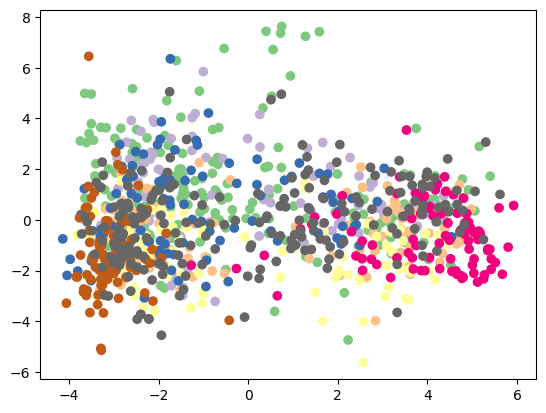

In [202]:
colors = {}
label_to_index = {label: index for index, label in enumerate(np.unique(mfccLabel))}

# Convert array of string labels to array of numerical indices
label_indices = np.array([label_to_index[label] for label in mfccLabel])

pca = PCA(n_components=2)
twoD = pca.fit_transform(X_scaled)
plot = plt.scatter(twoD[:,0], twoD[:,1], c=label_indices, cmap='Accent')
plt.show()

In [143]:
def plot_data_centroid(data, centroids, new_centroids):
    pca = PCA(n_components=2)
    twoD = pca.fit_transform(data)
    csD = pca.transform(centroids)
    new_csD = pca.transform(new_centroids)
    plot = plt.scatter(twoD[:,0], twoD[:,1], c='green')
    plot = plt.scatter(csD[:,0], csD[:,1], c='red')
    plot = plt.scatter(new_csD[:,0], new_csD[:,1], c='blue')
    plt.show()
    

In [187]:
#train, test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, test_size = 0.2)
print(len(train), len(test))

800 200


In [188]:
def labeling(data, centroids):
    
    distances = np.sum(np.abs(data - centroids[:, np.newaxis]), axis = 2)
    labels = np.argmin(distances, axis=0)
    
    return labels
    

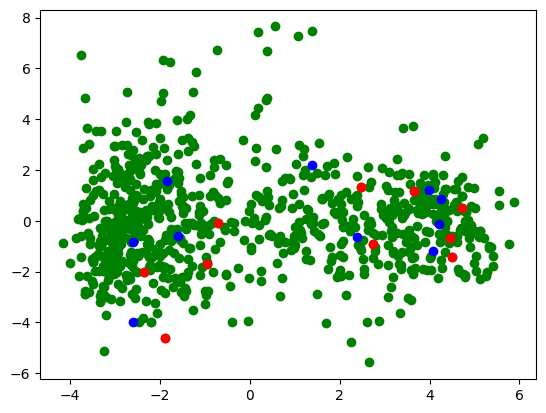

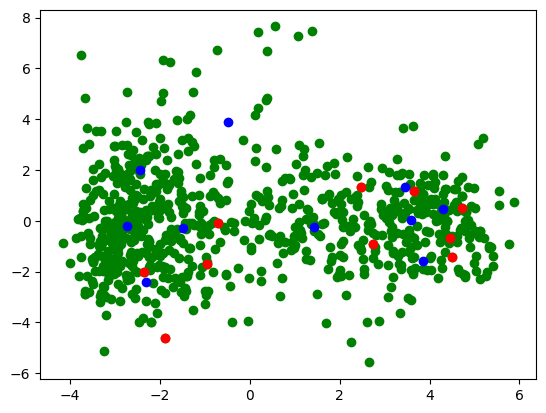

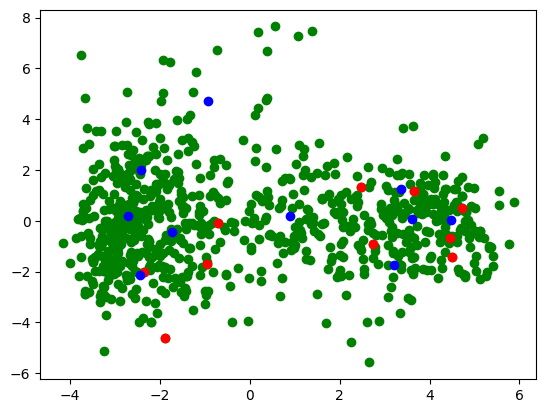

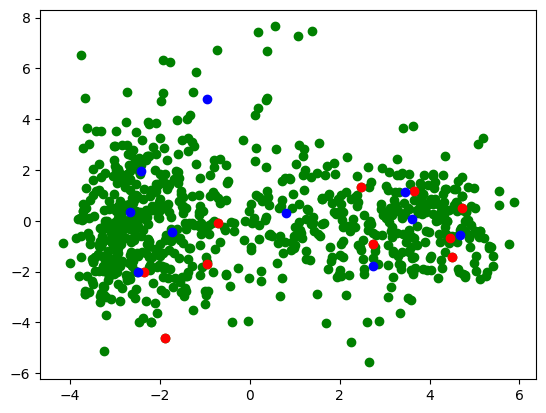

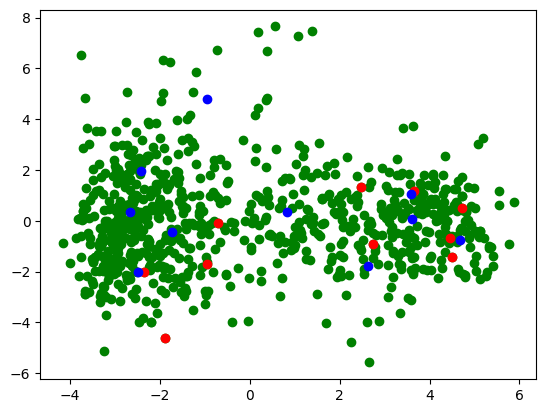

In [189]:
def train_kmeans(train_data, k, max_iters=100):
    c = np.random.choice(range(len(train_data)), size=k, replace=False)
    centroids = train_data[c]
    firsts = centroids
    for iteration in range(max_iters):
        labels = labeling(train_data, centroids)
        
        new_centroids = np.array([train_data[labels == i].mean(axis = 0) for i in range(k)])
        
        if iteration % 5 == 0 :
            plot_data_centroid(train_data, firsts, new_centroids )
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids
        

    
centroids = train_kmeans(train, 10)


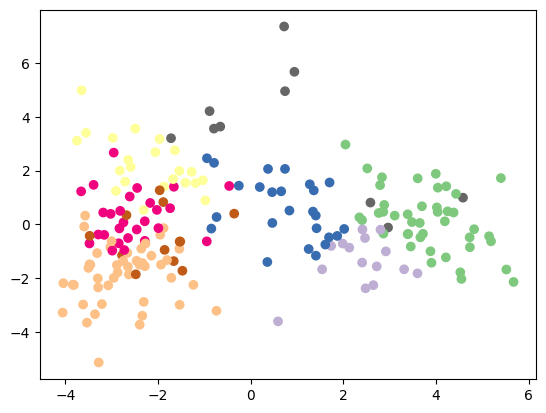

In [204]:
test_labels = labeling(test, centroids)
test_colors = {}
test_label_to_index = {label: index for index, label in enumerate(np.unique(test_labels))}

test_label_indices = np.array([test_label_to_index[label] for label in test_labels])

test_twoD = pca.transform(test)
predict_plot = plt.scatter(test_twoD[:,0], test_twoD[:,1], c=test_label_indices, cmap='Accent')
plt.show()
true_plot = plt.scatter(test_twoD[:,0], test_twoD[:,1], c=test_label_indices, cmap='Accent')
plt.show()
